<a href="https://colab.research.google.com/github/MuddLoser/semestral/blob/main/SpaceInv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym
!pip install gym[atari]
!pip install numpy
!pip install autorom[accept-rom-license]
!pip install pyvirtualdisplay

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446667 sha256=b361a15192b918c0e5cc6b730a74862353ad47a506e1bfe202cd3d5556cafa4b
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [4]:
import gym
import numpy as np
import random

from IPython.display import display, clear_output
from time import sleep

import matplotlib.pyplot as plt
from pyvirtualdisplay import Display

!AutoROM --accept-license
import os
os.environ['SDL_VIDEODRIVER'] = 'dummy'

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.10/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:297: UserWarning: WARN: No render fps was declare

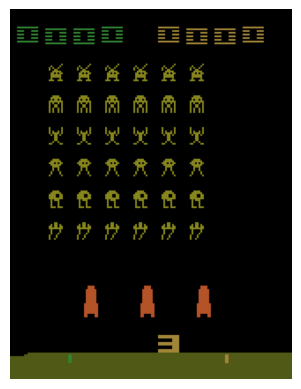

In [3]:
new_step_api=True
env = gym.make('SpaceInvaders-v4', render_mode='rgb_array')
height, width, channels = env.observation_space.shape
actions = env.action_space.n

state = env.reset()
# print(f"Initial state: {state}")

def show_rendered_env(env):
  plt.imshow(env.render(mode='rgb_array'))
  plt.axis('off')
  plt.show()

# Example usage: Render and display the initial state
show_rendered_env(env)

In [ ]:
# 0: NOOP
# 1: FIRE
# 2: RIGHT
# 3: LEFT
# 4: RIGHTFIRE
# 5: LEFTFIRE

state_size = env.observation_space.shape
state_size_flat = np.prod(state_size)
action_size = env.action_space.n

qtable = np.zeros((state_size_flat, action_size))

# print(f"Q table: {qtable}")

learning_rate = 0.5
discount_rate = 0.8

reward = 10

state = env.observation_space.sample()
state_flat = state.flatten()

action = env.action_space.sample()

new_state = env.observation_space.sample()
new_state_flat = new_state.flatten()

qtable[state_flat, action] += learning_rate * (reward + discount_rate * np.max(qtable[new_state_flat,:]) - qtable[state_flat,action])

# print(f"Q-value for (state, action) pair ({state}, {action}): {qtable[state,action]}")

episode = random.randint(0,500)
qtable = np.random.randn(state_size_flat, action_size)

epsilon = 0.5
decay_rate = 0.01

if random.uniform(0,1) < epsilon:
    action = env.action_space.sample()
else:
    action = np.argmax(qtable[state.flatten(),:])

epsilon = np.exp(-decay_rate*episode)
print(f"Q table: {qtable}")

Q table: [[ 0.07018047 -0.30493751 -1.3740064  -0.06683379  1.35391267 -1.25365776]
 [ 1.19814012 -1.31279716 -1.2419684  -0.2016437   0.92481486  0.63937275]
 [-1.28644759 -0.02936391  0.42609234  0.39868862  0.31078358  0.17184652]
 ...
 [ 1.4570849   1.021574   -1.21156232  0.26137885  0.45720262  0.89330269]
 [-2.37151821  1.21475739  0.67693829 -1.03132232 -1.48037471 -1.2718051 ]
 [ 1.48117331  0.05096867 -1.27773262 -1.14414965  0.08420031  0.46799627]]


TRAINED AGENT
+++++EPISODE 30+++++
Step 200


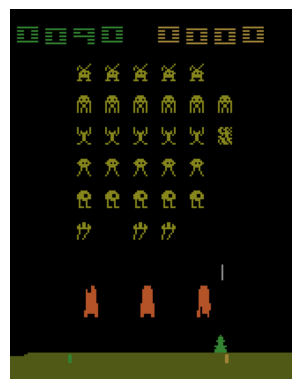

In [ ]:
class bcolors:
    RED= '\u001b[31m'
    GREEN= '\u001b[32m'
    RESET= '\u001b[0m'

env = gym.make('SpaceInvaders-v4', render_mode='rgb_array')

state_size = env.observation_space.shape
state_size_flat = np.prod(state_size)
action_size = env.action_space.n
qtable = np.zeros((state_size_flat, action_size))

learning_rate = 0.9
discount_rate = 0.8
epsilon = 0.5
decay_rate= 0.01
sum_rew = 0;
rew_list = []
num_steps = 200
num_episodes = 2000
max_steps = 200

print("AGENT IS TRAINING...")

for episode in range(num_episodes):
    # Reinicia entorno
    state_raw = env.reset()
    # Transforma estado (imagen) en int para q table
    state = state_raw[0].flatten()
    step = 0
    done = False
    for step in range(max_steps):
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(qtable[state,:])

        new_state_raw, reward, done, info = env.step(action)

        new_state = new_state_raw[0].flatten()

        qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])

        state = new_state

        if done == True:
            break

    epsilon = np.exp(-decay_rate*episode)


clear_output()
print(f"Our Q-table: {qtable}")
print(f"Training completed over {num_episodes} episodes")
input("Press Enter to see our trained space invader agent")
sleep(0.2)
clear_output()

episodes_to_preview = 30
for episode in range(episodes_to_preview):

    state_raw = env.reset()
    state = state_raw[0].flatten()
    step = 0
    done = False
    episode_rewards = 0

    for step in range(num_steps):

        clear_output(wait=True)

        print(f"TRAINED AGENT")
        print(f"+++++EPISODE {episode+1}+++++")
        print(f"Step {step+1}")

        action = np.argmax(qtable[state,:])

        new_state_raw, reward, done, info = env.step(action)
        new_state = new_state_raw[0].flatten()  # Flatten the new_state

        episode_rewards += reward

        show_rendered_env(env)
    sum_rew = sum_rew + episode_rewards
    rew_list.append(episode_rewards)

In [ ]:

print(f"Average reward: {sum_rew/episodes_to_preview}")

plt.style.use('_mpl-gallery')
# make data
x = np.linspace(1, episodes_to_preview, episodes_to_preview)

fig, ax = plt.subplots()
ax.plot(x, rew_list, 'b')
ax.set(xlabel='Episodio', ylabel='Recompensa')

env.close()